# Introduction to Statistics for Data Analysis

- we talked about 3 elements data science:
- Coding
- Multivariate statistics
- Domain knowledge
- start with an introduction to important statistical concepts

# Example

- let's assume we want to know how many cars use a certain road per day
- we install some device counts the cars every day for a week
- we get 7 numbers
- which number should we report as the number of cars per day?
- __average__

In [2]:
import numpy as np

def count_cars(days):    
    x = np.random.normal(3000,np.sqrt(3000),days)
    cars_per_day = []
    for i in range(days):
        cars_per_day.append(int(x[i]))
    average = np.average(cars_per_day)
    return cars_per_day, average

days = 700
cars_per_day, average = count_cars(days)
print("cars per day = ", cars_per_day)
print("average number of cars per day over",days,"days = ", average)

cars per day =  [3059, 2911, 3048, 2943, 2958, 3006, 2970, 3056, 3033, 3019, 3038, 3019, 3023, 2976, 2993, 2966, 2999, 3051, 3044, 2985, 3007, 2890, 2968, 2994, 3003, 2958, 3033, 2873, 3029, 3084, 2974, 2999, 2907, 2919, 3032, 3044, 3056, 2994, 3033, 2971, 3039, 3094, 3077, 3079, 2935, 2963, 3033, 3010, 3036, 3089, 2998, 3054, 3085, 2924, 3075, 3012, 3053, 3017, 3059, 2909, 3035, 3027, 3000, 2955, 3003, 2914, 2968, 3030, 2938, 2913, 2962, 3042, 2862, 3041, 2986, 3156, 3100, 2943, 2923, 3070, 2944, 3010, 2907, 2990, 2965, 3046, 2976, 3000, 3016, 2903, 3032, 3050, 3021, 3000, 2989, 3030, 3076, 2961, 2998, 3037, 2951, 3032, 2954, 3110, 3037, 3034, 3069, 3019, 3040, 2946, 3083, 3043, 2874, 2958, 3066, 3027, 3030, 2931, 2973, 3073, 2949, 2943, 3089, 3006, 2905, 3046, 3050, 2943, 2933, 3125, 3032, 3087, 3055, 2968, 2957, 3091, 2982, 3017, 3123, 2983, 3016, 2926, 2941, 2970, 2940, 2858, 3021, 2978, 3025, 2925, 3037, 2996, 3037, 2938, 3048, 3106, 3079, 2949, 2884, 3065, 3004, 2895, 3116, 2906,

- are we done here? 
- well, not if we want to do data __science__
- in science (in particular physics, but everywhere else as well) the uncertainty of our measurement is as important as the measurement itself
- let's look at our data

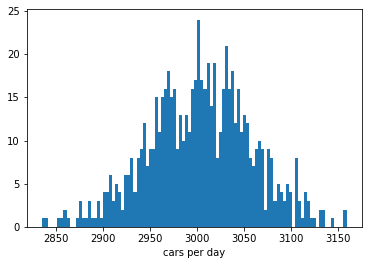

In [3]:
import matplotlib.pyplot as plt

plt.hist(cars_per_day, bins = 100)
plt.xlabel('cars per day')
plt.show()

- What is the uncertainty on the number of cars per day? 
- How can we calculate it from the distribution?
- the distribution has three characteristic parameters:

1. the *average* : $\mu$
2. the *number of measurements*: N
3. the *spread of the distribution*: $\sigma$

- which of these three characteristics will determine the uncertainty?

- if there are more measurements, we are adding __information__
- more information should mean that the uncertainty decreases when N increases
- the spread $\sigma$ of the distribution is directly related to the uncertainty: the bigger the spread the bigger the uncertainty

- how do we characterize the spread of the distribution?
- use the __Variance__ !
- defined as $var = \frac{1}{N-1} \sum_{i=0}^{N-1} (x_i - \langle x_i \rangle)^2$
- We usually talk about the standard deviation std $ = \sqrt(\mbox{var})$
- For a given variance and N, the uncertainty will not depend on the average $\mu$!
- the uncertainty will be $\sigma = \mbox{std}/\sqrt(N)$

In [4]:
var = np.var(cars_per_day)
std = np.std(cars_per_day)
print("variance = ",var, ", standard deviation = ",std, ", uncertainty = ",std/np.sqrt(days))


variance =  3041.999012244898 , standard deviation =  55.1543199780842 , uncertainty =  2.084637348469889


- let's do an "experiment" to check that this is makes sense
- let's repeat the measurement 100 times and see how much the measurements spread out
- that should match the calculated uncertainty

standard deviation of cars_per_week: 19.674760118341617


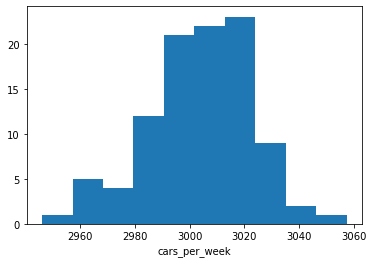

In [5]:
cars_per_week = []
for i in range(100):
    cars_per_day, average = count_cars(7)
    cars_per_week.append(average)
#    print("Week",i, ":", cars_per_week[-1])
print("standard deviation of cars_per_week:",np.std(cars_per_week))
plt.hist(cars_per_week)
plt.xlabel('cars_per_week')
plt.show()

# Lesson 1

- in a counting experiment the uncertainty will depend on the number of observations and on the standard deviation of observations
- $\sigma = \mbox{std}/\sqrt(N)$
- to reduce the uncertainty we can make more measurements or we can make each measurement more precise (reduce the standard deviation
- __when calculating uncertainty, do not forget the $\sqrt(N)$ factor__

# Types of uncertainties

- the __counting uncertainty__ we have discussed is an example of an *statistical uncertainty*
- statistical uncertainties can be improved by running the measurement longer (increasing N) or by repeating the measurement (multiple trials)
- there are also __systematic__ uncertainties

# Systematic Uncertainties

- Measurements usually also have __systematic uncertainties__
- These arise from __inherent imperfections__ in the data source, measurement apparatus, method or prior information
- Examples: 
- If occasionally the person counting cars doesn’t pay attention, the measurement will be low
- If the person measures for 25 hours, the measurement will be high
- __Simply repeating the measurement will usually not reduce the systematic uncertainty__

# Systematic uncertainties

__Systematic imperfection in__
- Method
- Apparatus
- Calibration
- Environment
- Model/hypothesis
- __Not independent from measurement to measurement__
- __Limits accuracy__

# Statistical uncertainties

- Random/statistical variation in underlying process or measurement
- e.g. counting errors, noise, background fluctuations
-  __Independent from measurement to measurement__
- __Limits precision__
- “Averages out” and improves when repeating the measurement/collecting more data

# Controlling systematic uncertainties

- Controlling and reducing systematic uncertainties is key to understanding data and drawing quantitative conclusions
- Statistical uncertainties can easily be measured and reduced by repeating the experiment
- Systematic uncertainties require a thorough understanding of all ingredients of the measurement:  imperfection of data source, underlying method, measurement apparatus, analysis method etc

# Controlling systematic uncertainties

- Calibration: Test and understand analysis accuracy for situations where answer is known
- Variation of method/analysis process: Do analysis different ways - do you get the same result?
- Stability of result: Does the result change when varying analysis method or parameters? Should be able to understand any observed change
- controlling the systematic uncertainties is the most challenging part in any given analysis project
- in machine learning, overtraining is an important source of systematic uncertainties

# Distributions

- measurements often conform to certain types of distributions (or probability density functions)
- we will look at some simple distributions and their statistical properties
- familiarity with these distributions is important for developing intuition about uncertainties, measurement process etc

# Uniform distribution

- data is equally likely to fall on any point on a given interval
- $P(x) = \mbox{constant for } a < x < b$
__Example :__


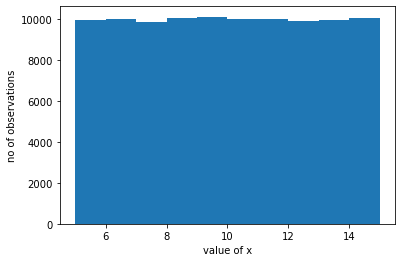

In [6]:
x = np.random.rand(100000)* 10 + 5
plt.hist(x)
plt.xlabel("value of x")
plt.ylabel("no of observations")
plt.show()

# Question 

- for the distribution above, if I pick numbers at random, what is the uncertainty? 
- E.g., if the only information you have about a measurement is that it is in the interval of 5 to 15, what uncertainty would you assign?

In [7]:
sigma = np.std(x)
print('Standard deviation of distribution from 5 to 15 is',sigma)

Standard deviation of distribution from 5 to 15 is 2.8868148606825517


In [8]:
print("(interval/std)^2 = ", np.square((15-5)/sigma))

(interval/std)^2 =  11.999471965841057


# Lesson

__uncertainty of a single measurement, from a uniform distribution of width $b - a$ is $\sigma = (b - a)/\sqrt(12)$__

# Poisson distribution

- one of the most important distributions in statistical analysis is the Poisson distribution
- it describes the outcome of counting experiments, where one has a constant rate of trials and a small constant probability that the trial will yield a certain result
- it was originally developed by Simeon Denis Poisson to describe the number of wrongful convictions in France
- the mathematical form is $P(X=k) = \lambda^k \times e^{-\lambda}/k!$, giving the probability of making $k$ observations in a given time. 
- the average of this distribution is $\lambda$ and the variance is also $\lambda$

Example: Number of car accidents per day

Counting on average  2998.261 cars per day
13  accidents on day 0
15  accidents on day 100
13  accidents on day 200
12  accidents on day 300
8  accidents on day 400
9  accidents on day 500
9  accidents on day 600
19  accidents on day 700
11  accidents on day 800
8  accidents on day 900
mean no of accident =  14.869 , 14.991305 expected
standard deviation = 14.895838999999997 , 14.991305 expected


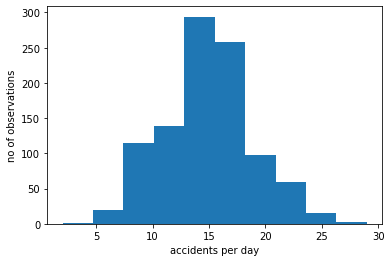

In [15]:
cars_per_day, average = count_cars(1000)
print("Counting on average ",average,"cars per day")

accident_probability = 0.005
accidents_per_day = []
for i in range(len(cars_per_day)):
    
    no_of_accidents = 0
    for j in range(cars_per_day[i]):
        x = np.random.rand()
        if(x < accident_probability):
            no_of_accidents += 1
    if(i%100 == 0):
        print(no_of_accidents," accidents on day",i)
    accidents_per_day.append(no_of_accidents)
    
plt.hist(accidents_per_day)
plt.xlabel("accidents per day")
plt.ylabel("no of observations")
print("mean no of accident = ",np.average(accidents_per_day), ",", average*accident_probability, "expected")
print("standard deviation =", np.var(accidents_per_day),",", average*accident_probability, "expected")
    

__What happens if we increase the average $\lambda$ ?__

Counting on average  2998.744 cars per day
55  accidents on day 0
60  accidents on day 100
50  accidents on day 200
70  accidents on day 300
57  accidents on day 400
76  accidents on day 500
53  accidents on day 600
51  accidents on day 700
49  accidents on day 800
65  accidents on day 900
mean no of accident =  60.255 , 59.974880000000006 expected
standard deviation = 59.72397499999999 , 59.974880000000006 expected


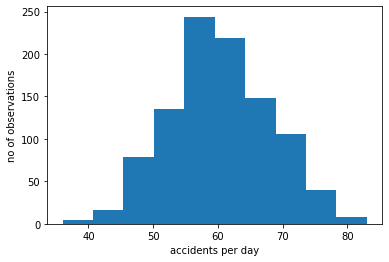

In [16]:
cars_per_day, average = count_cars(1000)
print("Counting on average ",average,"cars per day")

accident_probability = 0.020
accidents_per_day = []
for i in range(len(cars_per_day)):
    
    no_of_accidents = 0
    for j in range(cars_per_day[i]):
        x = np.random.rand()
        if(x < accident_probability):
            no_of_accidents += 1
    if(i%100 == 0):
        print(no_of_accidents," accidents on day",i)
    accidents_per_day.append(no_of_accidents)
    
plt.hist(accidents_per_day)
plt.xlabel("accidents per day")
plt.ylabel("no of observations")
print("mean no of accident = ",np.average(accidents_per_day), ",", average*accident_probability, "expected")
print("standard deviation =", np.var(accidents_per_day),",", average*accident_probability, "expected")

- __Starts to look like a normal distribution (Gaussian distribution)__
- this is not a coincidence, but mathematically correct: the Gaussian distribution is the limit of the Poisson distribution for large $\lambda$


# Gaussian distribution (Normal distribution in statistics)

- $P(x) = \frac{1}{\sigma \sqrt(2 \pi)} e^-\frac{(x - \mu)^2}{2 \sigma^2}$
- another very imporant probabilit distribution

__Example:__

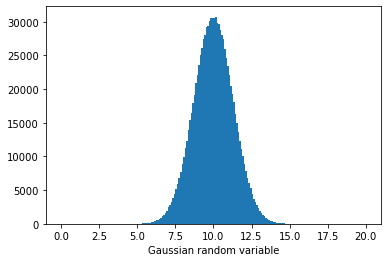

In [19]:
x = np.random.normal(10,1.3,1000000)

plt.hist(x, bins = 200, range = [0,20])
plt.xlabel("Gaussian random variable")
plt.show()

- Why is the Gaussian distribution important?
- because we see it everywhere in data, measurements, nature
- Why? ==> __Central Limit Theorem__

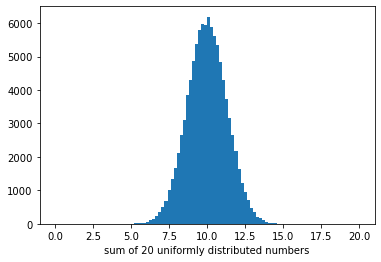

In [23]:
# Generate 10 random numbers according to flat distribution from 0 to 1 and add them up
# repeat 100 times

sum = []
for i in range(100000):
    x = 0
    for j in range(20):
        x += np.random.rand()
    sum.append(x)
    
plt.hist(sum, bins=100, range = [0,20])
plt.xlabel("sum of 20 uniformly distributed numbers")
plt.show()



- __that looks like a Gaussian__
- in general any combination (sum, product, convolution) of sufficiently many, sufficiently well behaved distributions will approach a Gaussian shape
- if your data and analysis have many different sources of uncertainty, the overall uncertainty will be well described by a Gaussian


# Combining uncertainties

- if we have uncertainties of $\sigma_1$ and $\sigma_2$, how will they combine to a total uncertainty?

__Example__


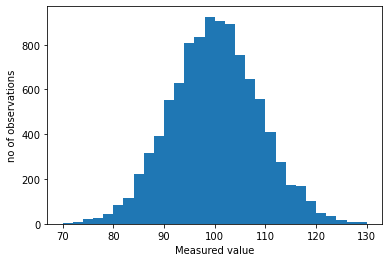

Standard variation of combined distribution is  8.742720776117363
Expectation is sqrt(4^2 + 6^2+5^2) =  8.774964387392123


In [27]:
# the expected value of our measurement is x = 100
# assuming there are two source of uncertainty with sigma_1 = 4 and sigma_2 = 6
# what will be the standard deviation of the resulting measured distribution?

x_mean = 100
sigma1 = 4
sigma2 = 6
sigma3 = 5

measured = []
for i in range(10000):
    x = x_mean
    x += np.random.normal(0,sigma1)
    x += np.random.normal(0,sigma2)
    x += np.random.normal(0,sigma3)
    measured.append(x)

plt.hist(measured, bins = 30, range = [70,130])
plt.xlabel("Measured value")
plt.ylabel("no of observations")
plt.show()

print("Standard variation of combined distribution is ",np.std(measured))
print("Expectation is sqrt(4^2 + 6^2+5^2) = ", np.sqrt(sigma1**2 + sigma2**2 + sigma3**2))

This is very imporant: __Uncertainties add in quadrature!__

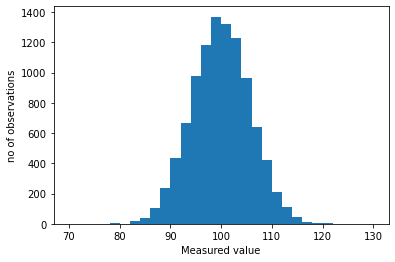

Standard variation of combined distribution is  5.706847600455444
Expectation is =  5.744562646538029


In [30]:
x_mean = 100
sigma1 = 2
sigma2 = 2
sigma3 = 5
measured = []
for i in range(10000):
    x = x_mean
    x += np.random.normal(0,sigma1)
    x += np.random.normal(0,sigma2)
    x += np.random.normal(0,sigma3)
    measured.append(x)

plt.hist(measured, bins = 30, range = [70,130])
plt.xlabel("Measured value")
plt.ylabel("no of observations")
plt.show()

print("Standard variation of combined distribution is ",np.std(measured))
print("Expectation is = ", np.sqrt(sigma1**2 + sigma2**2 + sigma3**2))

- Because uncertainties add in quadrature, a single large uncertainty will dominate many small uncertainties
- when analyzing data, always need to see if there is one dominant uncertainty
- __if yes, try to reduce dominant uncertainty!__